In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
zip_path = "/content/drive/MyDrive/archive (2).zip"

In [3]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("./GTSRB")

In [4]:
import pickle

data = []
labels = []
classes = 43

with open('./GTSRB/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)

data, labels = train['features'], train['labels']

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (34799, 32, 32, 3)
Labels shape: (34799,)


In [5]:
data = data / 255.0
labels = to_categorical(labels, classes)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27839, 32, 32, 3)
(6960, 32, 32, 3)
(27839, 43)
(6960, 43)


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 44s 96ms/step - accuracy: 0.2664 - loss: 2.7820 - val_accuracy: 0.8270 - val_loss: 0.6836
Epoch 2/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - accuracy: 0.7342 - loss: 0.8623 - val_accuracy: 0.9338 - val_loss: 0.2872
Epoch 3/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 77s 89ms/step - accuracy: 0.8498 - loss: 0.4788 - val_accuracy: 0.9609 - val_loss: 0.1607
Epoch 4/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.8971 - loss: 0.3297 - val_accuracy: 0.9754 - val_loss: 0.1073
Epoch 5/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9202 - loss: 0.2541 - val_accuracy: 0.9803 - val_loss: 0.0892
Epoch 6/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 46s 92ms/step - accuracy: 0.9373 - loss: 0.1997 - val_accuracy: 0.9855 - val_loss: 0.0709
Epoch 7/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.9473 - loss: 0.1726 - val_accuracy: 0.9865 - val_loss: 0.0604
Epoch 8/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9505 - loss: 0.1519 - 

In [20]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


In [21]:
print(y_pred)
print(y_pred_classes)
print(y_true)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.3445659e-11 2.5530643e-04 9.9974477e-01 ... 4.8716237e-16
  2.6427900e-25 1.7330103e-27]
 [5.6803168e-05 9.9456978e-01 3.1330762e-03 ... 2.3141367e-09
  3.5526273e-11 2.0666530e-10]
 ...
 [5.7121552e-09 1.1077353e-07 1.5286076e-09 ... 2.3478179e-08
  1.2028330e-13 2.8378949e-10]
 [2.1255916e-32 2.8220363e-18 9.9999994e-01 ... 1.3260645e-29
  0.0000000e+00 0.0000000e+00]
 [8.5274237e-15 3.3167147e-14 2.6344673e-15 ... 9.3704392e-15
  1.6678719e-19 4.9943670e-22]]
[11  2  1 ...  7  2 25]
[11  2  1 ...  7  2 25]


In [22]:
print(accuracy_score(y_true, y_pred_classes))

0.9949712643678161


In [25]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       425
           2       1.00      0.99      0.99       394
           3       0.98      1.00      0.99       242
           4       0.99      1.00      1.00       373
           5       1.00      0.98      0.99       338
           6       1.00      1.00      1.00        56
           7       0.99      1.00      1.00       242
           8       1.00      0.99      0.99       237
           9       0.98      1.00      0.99       253
          10       0.99      1.00      1.00       332
          11       0.98      1.00      0.99       229
          12       1.00      1.00      1.00       417
          13       1.00      1.00      1.00       386
          14       1.00      1.00      1.00       130
          15       0.99      1.00      1.00       125
          16       1.00      1.00      1.00        77
          17       1.00    

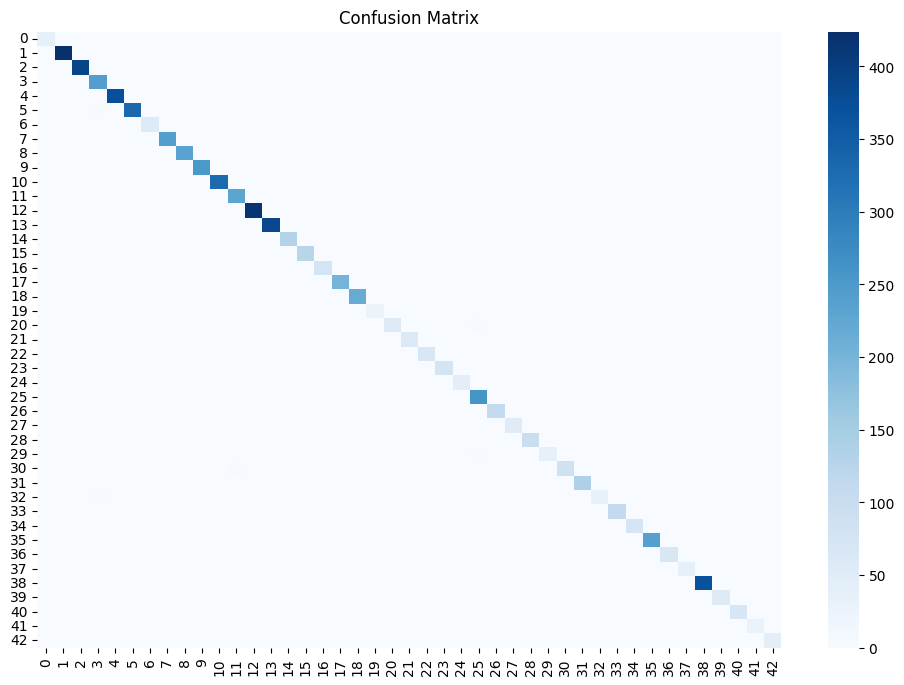

In [26]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

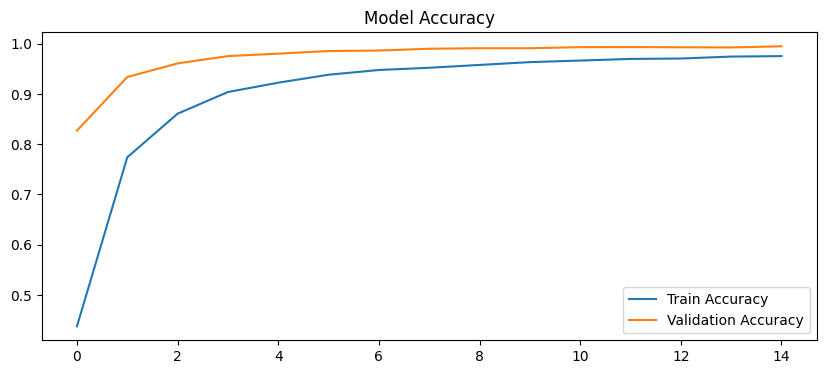

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

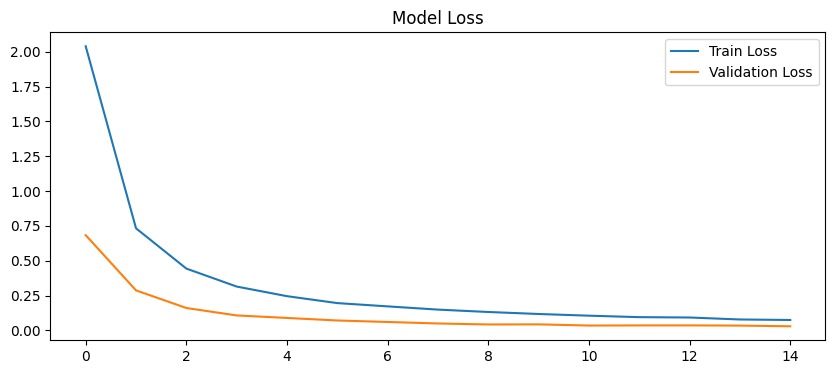

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

#Bonus

#Data augmentation


In [29]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False
)

datagen.fit(X_train)

In [30]:
aug_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history_aug = aug_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


435/435 ━━━━━━━━━━━━━━━━━━━━ 59s 132ms/step - accuracy: 0.1520 - loss: 3.1715 - val_accuracy: 0.5313 - val_loss: 1.5624
Epoch 2/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - accuracy: 0.4393 - loss: 1.8180 - val_accuracy: 0.6872 - val_loss: 0.9587
Epoch 3/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 54s 125ms/step - accuracy: 0.5557 - loss: 1.3683 - val_accuracy: 0.7991 - val_loss: 0.6410
Epoch 4/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 90s 144ms/step - accuracy: 0.6340 - loss: 1.1100 - val_accuracy: 0.8710 - val_loss: 0.4762
Epoch 5/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 59s 136ms/step - accuracy: 0.6832 - loss: 0.9637 - val_accuracy: 0.8999 - val_loss: 0.3614
Epoch 6/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.7185 - loss: 0.8526 - val_accuracy: 0.9254 - val_loss: 0.2728
Epoch 7/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 48s 111ms/step - accuracy: 0.7518 - loss: 0.7594 - val_accuracy: 0.9386 - val_loss: 0.2256
Epoch 8/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 85s 117ms/step - accuracy: 0.7800 - loss: 0.6839 - val

In [32]:
y_pred_aug = aug_model.predict(X_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)

218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [33]:
print(y_pred_aug)
print(y_pred_classes_aug)

[[1.08566420e-24 1.98672852e-17 1.29685995e-23 ... 4.16714675e-31
  3.94631729e-34 1.69874396e-23]
 [1.29749696e-05 2.29029043e-04 9.99379933e-01 ... 3.48812407e-12
  6.12261080e-26 2.60748664e-23]
 [6.18231716e-03 8.35287750e-01 7.13551044e-02 ... 1.25698032e-04
  2.04183470e-05 3.69125009e-05]
 ...
 [2.32280421e-04 2.10752897e-03 2.62430031e-02 ... 3.67431276e-05
  3.27864491e-08 3.65677115e-05]
 [6.13403950e-09 1.04354831e-05 9.99986708e-01 ... 6.19343002e-21
  5.41525452e-35 5.09048288e-34]
 [1.53424349e-08 1.12581824e-06 1.47237949e-06 ... 5.46742061e-11
  4.32058496e-14 4.81458233e-12]]
[11  2  1 ...  7  2 25]


In [34]:
print(accuracy_score(y_true, y_pred_classes_aug))

0.9612068965517241


In [35]:
print(classification_report(y_true, y_pred_classes_aug))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        38
           1       0.99      0.94      0.97       425
           2       0.90      0.97      0.94       394
           3       0.97      0.95      0.96       242
           4       0.98      0.98      0.98       373
           5       0.86      0.91      0.88       338
           6       1.00      1.00      1.00        56
           7       0.96      0.75      0.84       242
           8       0.85      0.94      0.89       237
           9       1.00      0.95      0.97       253
          10       0.97      1.00      0.98       332
          11       0.98      0.97      0.97       229
          12       0.99      1.00      1.00       417
          13       1.00      1.00      1.00       386
          14       1.00      1.00      1.00       130
          15       0.98      1.00      0.99       125
          16       1.00      0.99      0.99        77
          17       1.00    

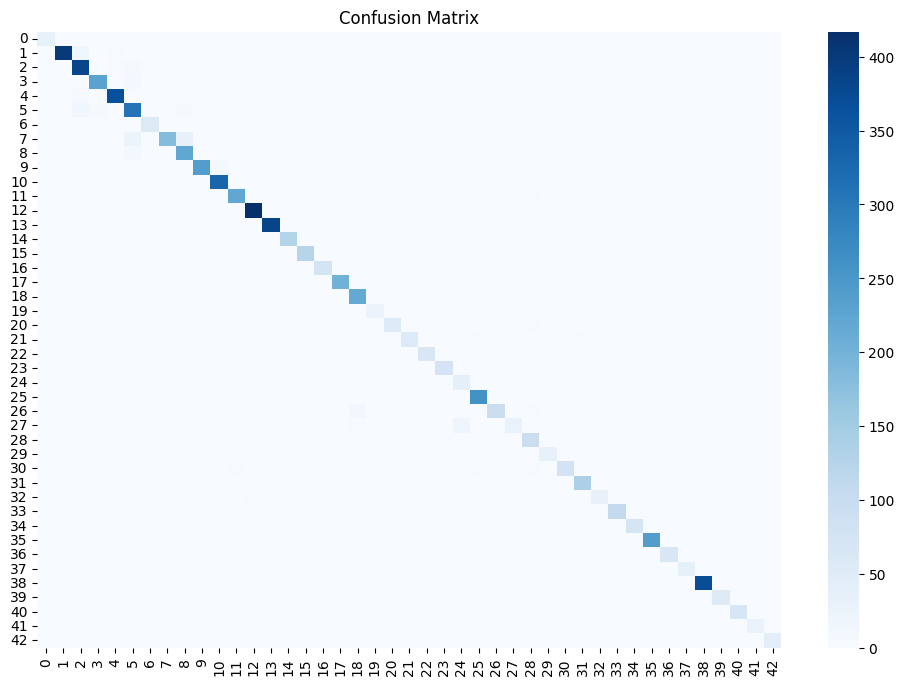

In [36]:
cm = confusion_matrix(y_true, y_pred_classes_aug)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

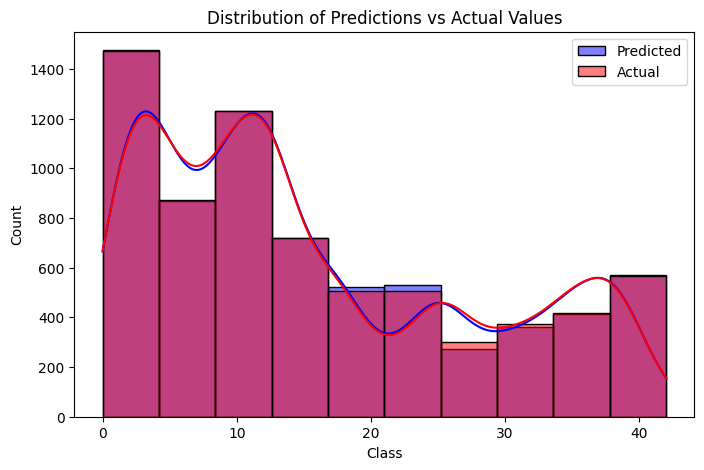

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_classes_aug, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_true, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#CNN vs MobileNet

In [7]:
train_datagen_mobile = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

test_datagen_mobile = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [8]:
train_generator_mobile = train_datagen_mobile.flow(
    X_train, y_train,
    batch_size=64,
    shuffle=True
)

test_generator_mobile = test_datagen_mobile.flow(
    X_test, y_test,
    batch_size=64,
    shuffle=False
)

In [11]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

/tmp/ipython-input-2797049627.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=predictions)
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


history_mobilenet = mobilenet_model.fit(
    train_generator_mobile,
    validation_data=test_generator_mobile,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


435/435 ━━━━━━━━━━━━━━━━━━━━ 59s 122ms/step - accuracy: 0.0369 - loss: 3.7022 - val_accuracy: 0.0611 - val_loss: 3.5277
Epoch 2/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 60s 138ms/step - accuracy: 0.0529 - loss: 3.5428 - val_accuracy: 0.0611 - val_loss: 3.4797
Epoch 3/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 52s 119ms/step - accuracy: 0.0577 - loss: 3.5172 - val_accuracy: 0.0655 - val_loss: 3.4715
Epoch 4/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 51s 117ms/step - accuracy: 0.0562 - loss: 3.5011 - val_accuracy: 0.0747 - val_loss: 3.4678
Epoch 5/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 46s 106ms/step - accuracy: 0.0577 - loss: 3.5032 - val_accuracy: 0.0746 - val_loss: 3.4638
Epoch 6/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.0616 - loss: 3.4888 - val_accuracy: 0.0754 - val_loss: 3.4610
Epoch 7/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 47s 108ms/step - accuracy: 0.0587 - loss: 3.4980 - val_accuracy: 0.0818 - val_loss: 3.4562
Epoch 8/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.0604 - loss: 3.4889 - val

In [13]:
y_pred_mobile = mobilenet_model.predict(test_generator_mobile)
y_pred_classes_mobile = np.argmax(y_pred_mobile, axis=1)

109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step


In [14]:
print(y_pred_mobile)
print(y_pred_classes_mobile)

[[0.00650402 0.0566768  0.05360074 ... 0.00975948 0.00783054 0.0071309 ]
 [0.00639533 0.05695278 0.05504955 ... 0.00969807 0.00779928 0.0069417 ]
 [0.00552565 0.05208891 0.05792089 ... 0.00848187 0.00701211 0.00675357]
 ...
 [0.00539122 0.05193175 0.05789467 ... 0.00833298 0.00693761 0.00670112]
 [0.00660092 0.05545565 0.05719494 ... 0.00982842 0.00782766 0.00706231]
 [0.00569921 0.05257314 0.05726828 ... 0.00872267 0.00715254 0.00684701]]
[13 13  2 ... 10 13  2]


In [18]:
print(accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_mobile))

0.08089080459770115


In [20]:
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes_mobile))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.14      0.08      0.10       425
           2       0.06      0.67      0.11       394
           3       0.00      0.00      0.00       242
           4       0.00      0.00      0.00       373
           5       0.00      0.00      0.00       338
           6       0.00      0.00      0.00        56
           7       0.00      0.00      0.00       242
           8       0.00      0.00      0.00       237
           9       0.00      0.00      0.00       253
          10       0.05      0.01      0.02       332
          11       0.00      0.00      0.00       229
          12       0.21      0.12      0.15       417
          13       0.10      0.54      0.18       386
          14       0.00      0.00      0.00       130
          15       0.00      0.00      0.00       125
          16       0.00      0.00      0.00        77
          17       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


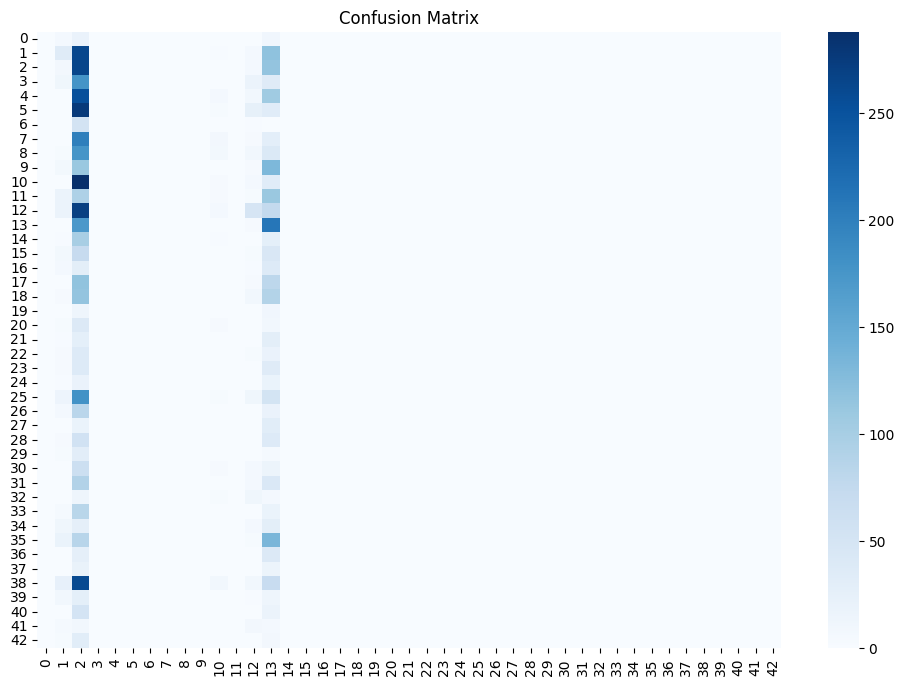

In [21]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes_mobile)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

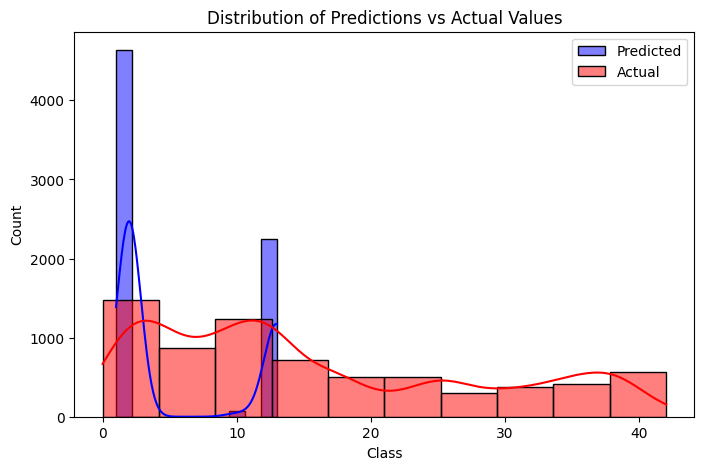

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_classes_mobile, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(np.argmax(y_test, axis=1), color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()